In [1]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import shap
import numpy as np
import matplotlib.pyplot as plt


2022-06-15 11:01:19.313356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /n/apps/CentOS7/lib64:/n/apps/CentOS7/install/rbenv-0.3.0/rbenv/libexec:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server:/n/apps/CentOS7/lib64:/n/apps/CentOS7/install/rbenv-0.3.0/rbenv/libexec:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server:/n/apps/CentOS7/lib64:/n/apps/CentOS7/lib64/R/lib:/usr/lib/jvm/java-1.8.0/jre/lib/amd64/server::/n/apps/CentOS7/install/guppy-2.3.1/l

In [2]:
from keras.utils import np_utils

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [4]:
print(x_train.shape)

(60000, 28, 28, 1)


In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(10, kernel_size=(5,5), strides=(1,1), padding='valid',activation='relu',input_shape=(28, 28,1)),
  tf.keras.layers.Conv2D(10, kernel_size=(5,5), strides=(1,1),padding='valid', activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(5,5), strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(5,5), strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(5,5), strides=(1,1), padding='valid',activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(5,5), strides=(1,1), padding='valid',activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(3,3), strides=(1,1), padding='valid',activation='relu'),
  tf.keras.layers.Conv2D(10, kernel_size=(2,2), strides=(1,1), padding='valid',activation='relu'),
  tf.keras.layers.Flatten()
])


In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 conv2d_17 (Conv2D)          (None, 20, 20, 10)        2510      
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 10)        2510      
                                                                 
 conv2d_19 (Conv2D)          (None, 12, 12, 10)        2510      
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 10)          2510      
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 10)          2510      
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 10)         

In [36]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=loss_fn,
              metrics=['accuracy'])

In [38]:
model.fit(x_train, y_train, epochs=3,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 37s 694us/sample - loss: 0.5493 - accuracy: 0.8285 - val_loss: 0.1189 - val_accuracy: 0.9647
Epoch 2/3
54000/54000 [==============================] - 36s 659us/sample - loss: 0.1299 - accuracy: 0.9610 - val_loss: 0.1160 - val_accuracy: 0.9662
Epoch 3/3
54000/54000 [==============================] - 35s 656us/sample - loss: 0.0970 - accuracy: 0.9714 - val_loss: 0.0807 - val_accuracy: 0.9778


In [39]:
model.evaluate(x_test,  y_test, verbose=2)


[0.08632724359179847, 0.9733]

In [40]:
predictions = model.predict(x_test)
predictions

array([[ 0.        ,  0.        ,  0.22090298, ..., 15.6643915 ,
         0.        ,  0.714398  ],
       [ 9.005997  ,  4.976961  , 17.10082   , ...,  1.3398407 ,
         4.054212  ,  0.        ],
       [ 0.        , 11.258733  ,  0.        , ...,  5.4369373 ,
         0.        ,  0.        ],
       ...,
       [ 1.228555  ,  5.272744  ,  5.6075907 , ...,  5.4991884 ,
         3.3026369 , 12.085221  ],
       [ 5.7249265 ,  0.        ,  0.        , ...,  0.        ,
         5.37968   ,  1.3564218 ],
       [ 3.8478456 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [41]:
with tf.compat.v1.Session().as_default():
    predictions_positive=tf.nn.softmax(predictions).eval()

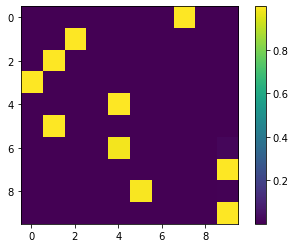

In [43]:
plt.imshow(predictions_positive[:10], interpolation='nearest')
plt.colorbar()

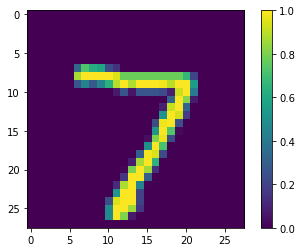

In [44]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [45]:
np.argmax(predictions[5])


1

In [46]:
y_test[5]

1

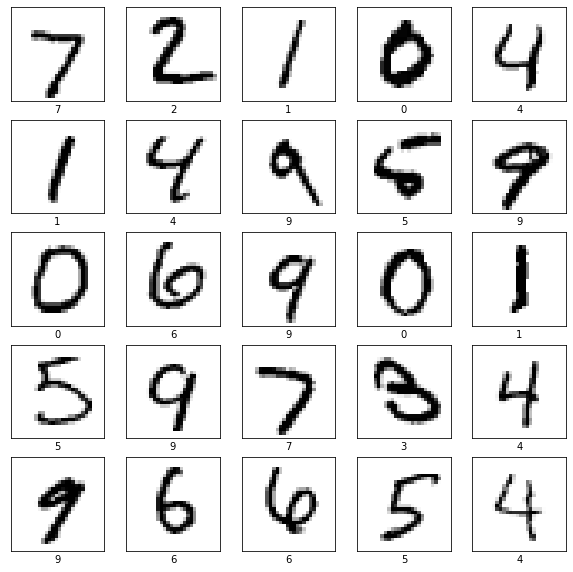

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()


In [48]:
class_names=['0' ,'1', '2', '3', '4', '5', '6', '7', '8', '9']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


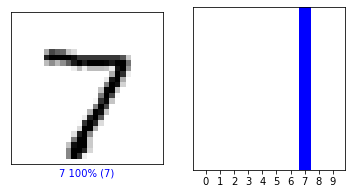

In [50]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_positive[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions_positive[i],  y_test)
plt.show()


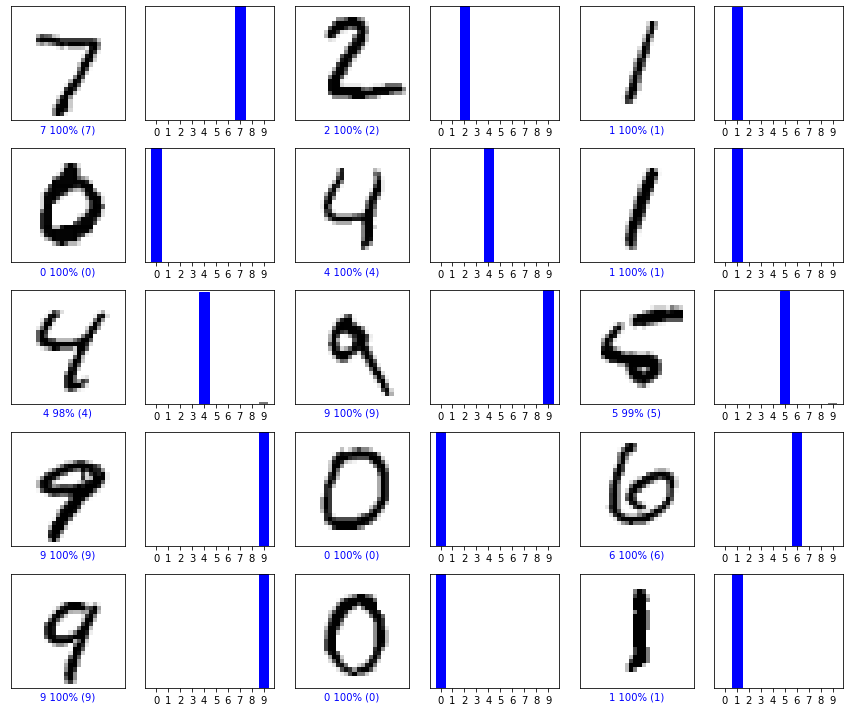

In [51]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_positive[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_positive[i], y_test)
plt.tight_layout()
plt.show()


267


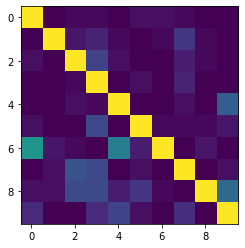

In [52]:
conf_mat=np.zeros((10,10))
#print(conf_mat)
misses=[]
for i,p in enumerate(predictions_positive):
    act_value=y_test[i]
    pred_value=np.argmax(p)
    conf_mat[act_value,pred_value]+=1
    if act_value!=pred_value:
        misses.append(i)
plt.imshow(conf_mat,vmax=50)
print(len(misses))

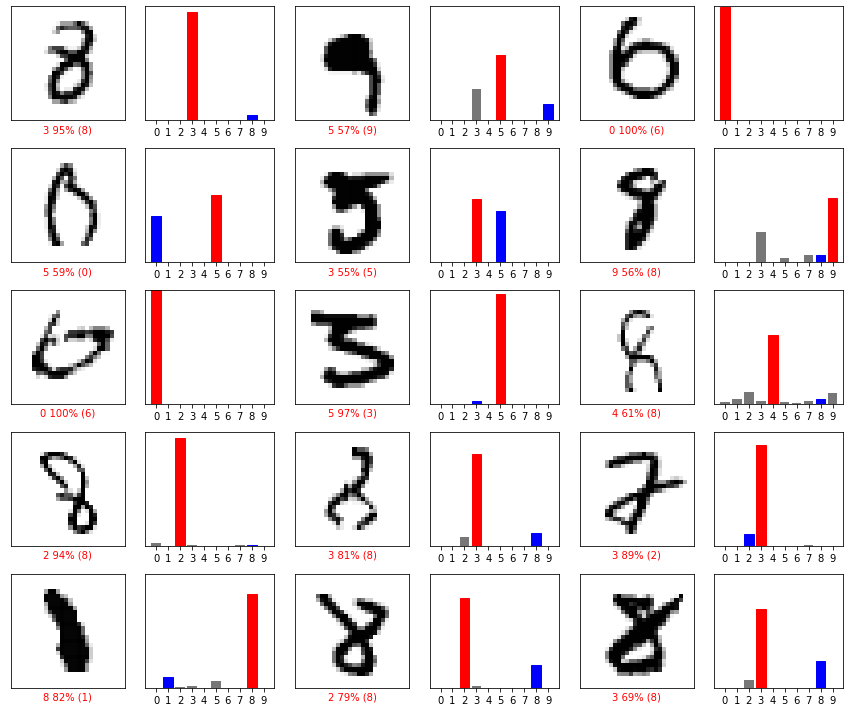

In [53]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(misses[i], predictions_positive[misses[i]], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(misses[i], predictions_positive[misses[i]], y_test)
plt.tight_layout()
plt.show()

In [66]:
import shap


In [55]:
def standard_combine_mult_and_diffref(mult,orig_inp,bg_data):
    to_return=[(mult[l]*(orig_inp[l]-bg_data[l])).mean(0)
                for l in range(len(orig_inp))]
    return to_return

In [58]:
def balplot(img,ax=plt):
    lim=np.max(np.abs(img))
    ax.imshow(img,vmax=lim,vmin=-lim,cmap='bwr')
    if(ax!=plt):
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

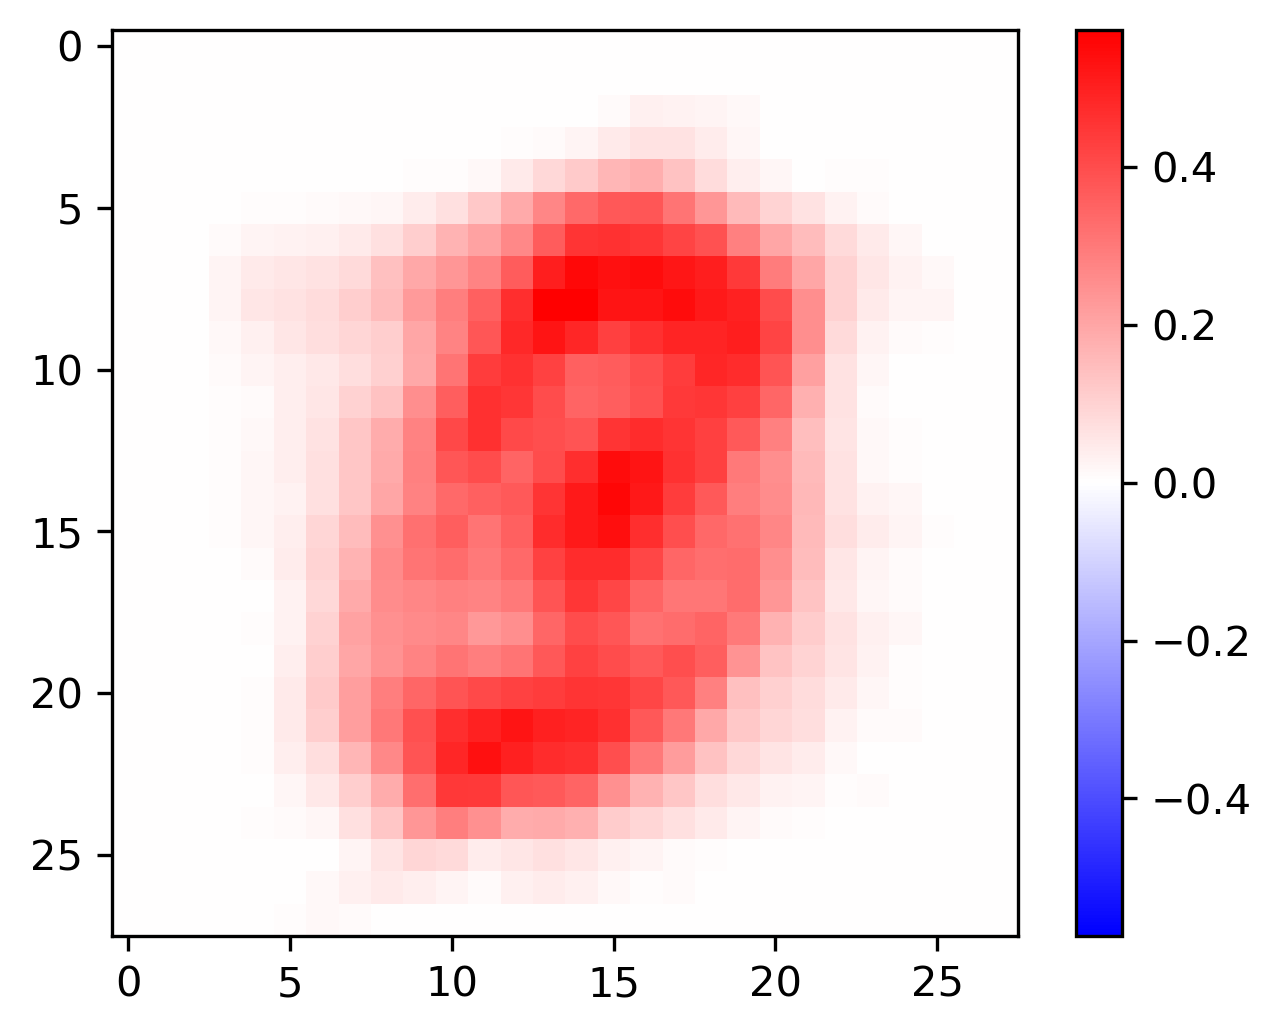

In [126]:
black_reference_images=x_train[:100]

black_reference_image=np.mean(black_reference_images,axis=0)
balplot(black_reference_image)
plt.colorbar();

In [130]:
scores=[]
for i in range(10):
    x=model.outputs[0][:,i]
    outputtarget=tf.reduce_sum(x,axis=0,keepdims=True)
    black_reference_explainer=shap.TFDeepExplainer((model.input,outputtarget),black_reference_images,combine_mult_and_diffref=standard_combine_mult_and_diffref)
    blackShapScores=black_reference_explainer.shap_values(x_test[misses],progress_message=100)
    scores.append(blackShapScores)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 267/267 [00:12<00:00, 20.84it/s]


NameError: name 'model' is not defined

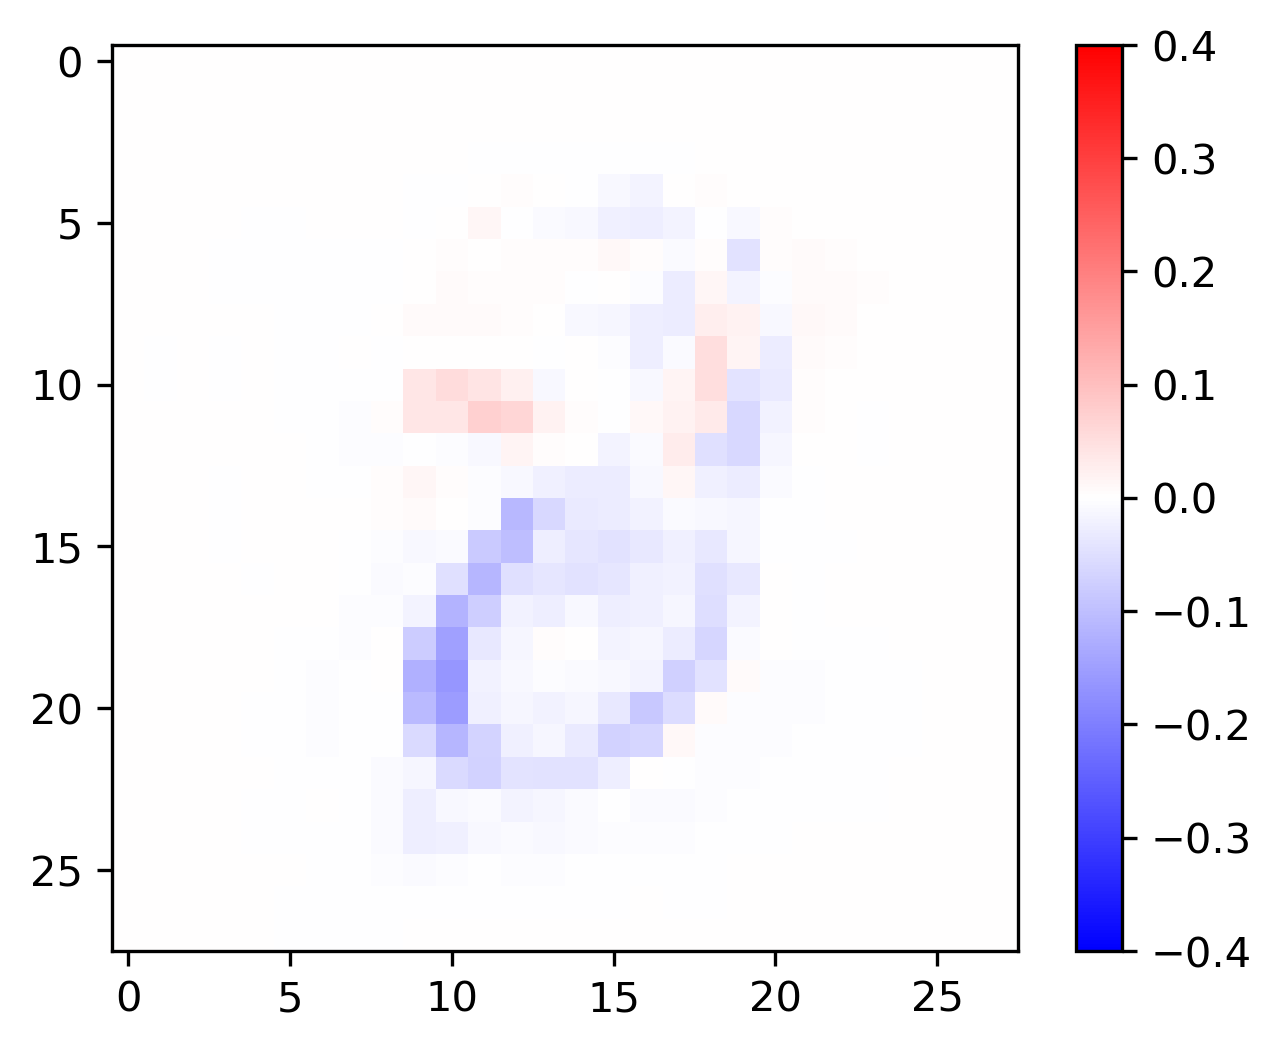

In [131]:
#print(blackShapScores.shape)
plt.imshow(scores[7][0],cmap='bwr',vmin=-0.4,vmax=0.4)
plt.colorbar()

(5, 11)


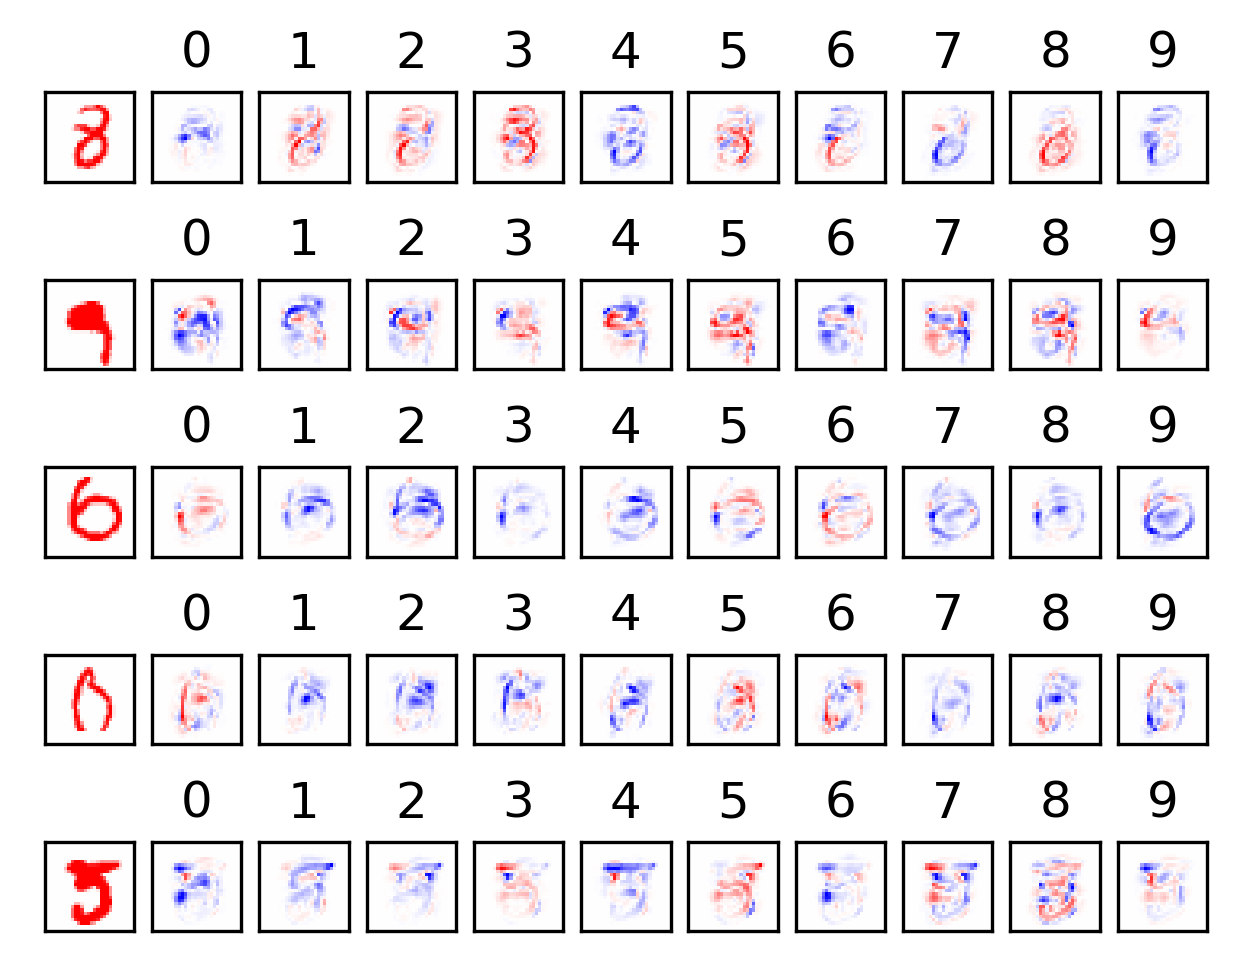

In [133]:
plt.rcParams['figure.figsize']=[5,4]
plt.rcParams['figure.dpi']=300
fig,ax =plt.subplots(nrows=5,ncols=11,sharex=True,sharey=True,squeeze=True)
print(ax.shape)
for i in range(5):
    balplot(x_test[misses[i]],ax=ax[i,0])
    for j in range(10):
        balplot(scores[j][i],ax=ax[i,j+1])
        ax[i,j+1].set_title(j)

In [ ]:
black_pred=model.predict(black_reference_images)
print(black_pred)